# Laboratory 2.5: Logistic regression + regularization

Here we will construct our first instance of the **logistic regression classifier** and couple it with some ideas regarding **regularization**. As per usual, you will need the `synthetic_dataset.csv` present in the .zip file you downloaded alongside this notebook. In this case, you also have a `utils.py` file that contains several functions to diagnose your model. Check the inner contents of that file (you will see that there we have some functions you already constructed in previous labs, mostly related to the characterization of the fit). 

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/) 
- Modelling and scoring:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)
    
### **All the things you need to do are marked by a "TODO" comment nearby. Make sure you *read carefully everything before working* and solve each point before submitting your solution.**

In [22]:
import numpy as np
import pandas as pd
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# From the "utils.py" file you will only need this...
from src.utils import classification_report

The following cell defines the class for the logistic regression model. In here, we will recover the same structure we have followed thus far in the course, implementing the same models we have used before but now in this new context. 

Here you can reuse the different functions you have implemented in previous notebooks to make your life easier (and, in fact, you will _need_ some of those functions here in order to make this model work).

**Before you start to work here, please read everything carefully, including the comments describing the inner workings of each method implemented. _Do not rush into writing code_, do things in an ordered fashion.**

For the initial part of the lab you will only need to complete the `.fit`, `.log_likelihood` and the `.sigmoid` method, since you will not perform regularization just yet. **Complete the code of this class as you need it**: Fill the `.fit` and the basic related methods as soon as you need it for later cells, leaving the regularization-related methods for later.

In [23]:
class LogisticRegressor:
    def __init__(self):
        """
        Initializes the Logistic Regressor model.

        Attributes:
        - weights (np.ndarray): A placeholder for the weights of the model.
                                These will be initialized in the training phase.
        - bias (float): A placeholder for the bias of the model.
                        This will also be initialized in the training phase.
        """
        self.weights = None
        self.bias = None

    def fit(
        self,
        X,
        y,
        learning_rate=0.01,
        num_iterations=1000,
        penalty=None,
        l1_ratio=0.5,
        C=1.0,
        verbose=False,
        print_every=100,
    ):
        """
        Fits the logistic regression model to the data using gradient descent.

        This method initializes the model's weights and bias, then iteratively updates these parameters by
        moving in the direction of the negative gradient of the loss function (computed using the
        log_likelihood method).

        The regularization terms are added to the gradient of the loss function as follows:

        - No regularization: The standard gradient descent updates are applied without any modification.

        - L1 (Lasso) regularization: Adds a term to the gradient that penalizes the absolute value of
            the weights, encouraging sparsity. The update rule for weight w_j is adjusted as follows:
            dw_j += (C / m) * sign(w_j) - Make sure you understand this!

        - L2 (Ridge) regularization: Adds a term to the gradient that penalizes the square of the weights,
            discouraging large weights. The update rule for weight w_j is:
            dw_j += (C / m) * w_j       - Make sure you understand this!


        - ElasticNet regularization: Combines L1 and L2 penalties.
            The update rule incorporates both the sign and the magnitude of the weights:
            dw_j += l1_ratio * gradient_of_lasso + (1 - l1_ratio) * gradient_of_ridge


        Parameters:
        - X (np.ndarray): The input features, with shape (m, n), where m is the number of examples and n is
                            the number of features.
        - y (np.ndarray): The true labels of the data, with shape (m,).
        - learning_rate (float): The step size at each iteration while moving toward a minimum of the
                            loss function.
        - num_iterations (int): The number of iterations for which the optimization algorithm should run.
        - penalty (str): Type of regularization (None, 'lasso', 'ridge', 'elasticnet'). Default is None.
        - l1_ratio (float): The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.
                            l1_ratio=0 corresponds to L2 penalty,
                            l1_ratio=1 to L1. Only used if penalty='elasticnet'.
                            Default is 0.5.
        - C (float): Inverse of regularization strength; must be a positive float.
                            Smaller values specify stronger regularization.
        - verbose (bool): Print loss every print_every iterations.
        - print_every (int): Period of number of iterations to show the loss.



        Updates:
        - self.weights: The weights of the model after training.
        - self.bias: The bias of the model after training.
        """
        import numpy as np

        # TODO: Obtain m (number of examples) and n (number of features)
        m, n = X.shape
    
        # Initialize all parameters to 0
        self.weights = np.zeros(n)
        self.bias = 0
        # TODO: Complete the gradient descent code
        # Tip: You can use the code you had in the previous practice
        # Execute the iterative gradient descent
        for i in range(num_iterations):  # Fill the None here

            # For these two next lines, you will need to implement the respective functions
            # Forward propagation
            y_hat = self.predict_proba(X)
            y_hat = np.array([[x] for x in y_hat])
            # Compute loss
            loss = self.log_likelihood(y, y_hat)

            # Logging
            if i % print_every == 0 and verbose:
                print(f"Iteration {i}: Loss {loss}")

            # TODO: Implement the gradient values
            # CAREFUL! You need to calculate the gradient of the loss function (*negative log-likelihood*)
            dw = (1 / m) * np.dot(X.T, (y_hat - y))  # Derivative w.r.t. the coefficients
            db = (1 / m) * np.sum(y_hat - y)  # Derivative w.r.t. the intercept
            # Regularization:
            # Apply regularization if it is selected.
            # We feed the regularization method the needed values, where "dw" is the derivative for the
            # coefficients, "m" is the number of examples and "C" is the regularization hyperparameter.
            # To do this, you will need to complete each regularization method.
            if penalty == "lasso":
                dw = self.lasso_regularization(dw, m, C)
            elif penalty == "ridge":
                dw = self.ridge_regularization(dw, m, C)
            elif penalty == "elasticnet":
                dw = self.elasticnet_regularization(dw, m, C, l1_ratio)
            dw = np.array(dw.T[0])
            # Update parameters
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def predict_proba(self, X):
        """
        Predicts probability estimates for all classes for each sample X.

        Parameters:
        - X (np.ndarray): The input features, with shape (m, n), where m is the number of samples and
            n is the number of features.

        Returns:
        - A numpy array of shape (m, 1) containing the probability of the positive class for each sample.
        """
        import numpy as np

        #z is the value of the logits. Write it here (use self.weights and self.bias):
        z = np.dot(X, self.weights) + self.bias

        # Return the associated probabilities via the sigmoid trasnformation (symmetric choice)
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        """
        Predicts class labels for samples in X.

        Parameters:
        - X (np.ndarray): The input features, with shape (m, n), where m is the number of samples and n
                            is the number of features.
        - threshold (float): Threshold used to convert probabilities into binary class labels.
                             Defaults to 0.5.

        Returns:
        - A numpy array of shape (m,) containing the class label (0 or 1) for each sample.
        """

        # Predict the class for each input data given the threshold in the argument
        probabilities = self.predict_proba(X)
        classification_result = (probabilities >= threshold).astype(int)

        return classification_result

    def lasso_regularization(self, dw, m, C):
        """
        Applies L1 regularization (Lasso) to the gradient during the weight update step in gradient descent.
        L1 regularization encourages sparsity in the model weights, potentially setting some weights to zero,
        which can serve as a form of feature selection.

        The L1 regularization term is added directly to the gradient of the loss function with respect to
        the weights. This term is proportional to the sign of each weight, scaled by the regularization
        strength (C) and inversely proportional to the number of samples (m).

        Parameters:
        - dw (np.ndarray): The gradient of the loss function with respect to the weights, before regularization.
        - m (int): The number of samples in the dataset.
        - C (float): Inverse of regularization strength; must be a positive float.
                    Smaller values specify stronger regularization.

        Returns:
        - np.ndarray: The adjusted gradient of the loss function with respect to the weights,
                      after applying L1 regularization.
        """

        import numpy as np
        # ADD THE LASSO CONTRIBUTION TO THE DERIVATIVE OF THE OBJECTIVE FUNCTION
        lasso_gradient = (C / m) * np.sign(self.weights)
        return dw + lasso_gradient

    def ridge_regularization(self, dw, m, C):
        """
        Applies L2 regularization (Ridge) to the gradient during the weight update step in gradient descent.
        L2 regularization penalizes the square of the weights, which discourages large weights and helps to
        prevent overfitting by promoting smaller and more distributed weight values.

        The L2 regularization term is added to the gradient of the loss function with respect to the weights
        as a term proportional to each weight, scaled by the regularization strength (C) and inversely
        proportional to the number of samples (m).

        Parameters:
        - dw (np.ndarray): The gradient of the loss function with respect to the weights, before regularization.
        - m (int): The number of samples in the dataset.
        - C (float): Inverse of regularization strength; must be a positive float.
                     Smaller values specify stronger regularization.

        Returns:
        - np.ndarray: The adjusted gradient of the loss function with respect to the weights,
                        after applying L2 regularization.
        """

        # TODO:
        # ADD THE RIDGE CONTRIBUTION TO THE DERIVATIVE OF THE OBJECTIVE FUNCTION
        ridge_gradient = (C/m) * self.weights
        return dw + ridge_gradient

    def elasticnet_regularization(self, dw, m, C, l1_ratio):
        """
        Applies Elastic Net regularization to the gradient during the weight update step in gradient descent.
        Elastic Net combines L1 and L2 regularization, incorporating both the sparsity-inducing properties
        of L1 and the weight shrinkage effect of L2. This can lead to a model that is robust to various types
        of data and prevents overfitting.

        The regularization term combines the L1 and L2 terms, scaled by the regularization strength (C) and
        the mix ratio (l1_ratio) between L1 and L2 regularization. The term is inversely proportional to the
        number of samples (m).

        Parameters:
        - dw (np.ndarray): The gradient of the loss function with respect to the weights, before regularization.
        - m (int): The number of samples in the dataset.
        - C (float): Inverse of regularization strength; must be a positive float.
                     Smaller values specify stronger regularization.
        - l1_ratio (float): The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds
                            to L2 penalty, l1_ratio=1 to L1. Only used if penalty='elasticnet'.
                            Default is 0.5.

        Returns:
        - np.ndarray: The adjusted gradient of the loss function with respect to the weights,
                      after applying Elastic Net regularization.
        """
        import numpy as np
        # ADD THE RIDGE CONTRIBUTION TO THE DERIVATIVE OF THE OBJECTIVE FUNCTION
        # Be careful! You can reuse the previous results and combine them here, but beware how you do this!
        lasso_gradient = (C / m) * np.sign(self.weights)
        ridge_gradient = (C/m) * self.weights
        elasticnet_gradient = l1_ratio * lasso_gradient + (1-l1_ratio) * ridge_gradient
        return dw + elasticnet_gradient

    @staticmethod
    def log_likelihood(y, y_hat):
        """
        Computes the Log-Likelihood loss for logistic regression, which is equivalent to
        computing the cross-entropy loss between the true labels and predicted probabilities.
        This loss function is used to measure how well the model predicts the actual class
        labels. The formula for the loss is:

        L(y, y_hat) = -(1/m) * sum(y * log(y_hat) + (1 - y) * log(1 - y_hat))

        where:
        - L(y, y_hat) is the loss function,
        - m is the number of observations,
        - y is the actual label of the observation,
        - y_hat is the predicted probability that the observation is of the positive class,
        - log is the natural logarithm.

        Parameters:
        - y (np.ndarray): The true labels of the data. Should be a 1D array of binary values (0 or 1).
        - y_hat (np.ndarray): The predicted probabilities of the data belonging to the positive class (1).
                            Should be a 1D array with values between 0 and 1.

        Returns:
        - The computed loss value as a scalar.
        """
        import numpy as np
        # Implement the loss function (log-likelihood)
        m = y.shape[0]  # Number of examples
        loss = -(1/m) * sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        return loss

    @staticmethod
    def sigmoid(z):
        """
        Computes the sigmoid of z, a scalar or numpy array of any size. The sigmoid function is used as the
        activation function in logistic regression, mapping any real-valued number into the range (0, 1),
        which can be interpreted as a probability. It is defined as 1 / (1 + exp(-z)), where exp(-z)
        is the exponential of the negative of z.

        Parameters:
        - z (float or np.ndarray): Input value or array for which to compute the sigmoid function.

        Returns:
        - The sigmoid of z.
        """
        import numpy as np
        #Implement the sigmoid function to convert the logits into probabilities
        sigmoid_value = 1 / (1 + np.exp(-z))
        return sigmoid_value


Now, let us import the dataset, as usual. Load the `synthetic_data.csv` file and split it into `X` (inputs) and `y` (output). The input variables are named as `input_XX` and the (sole) target variable is named `target`. As you will see, it is a dataset where the target variable is binary categorical, coded with `1`s and `0`s. 

In [58]:
df = pd.read_csv("synthetic_dataset.csv", sep = ",")
# TODO: Separate the X and y values
X = df.iloc[:, :20] 
y = df.iloc[:, 20:]

print(y)
# Convert the pandas dataframes into np.arrays so that we can use all the previous codes we defined
# Warning: Watch out for the dimensions!!

X = np.array(X)
y = np.array(y)
m, n = X.shape
LogReg = LogisticRegressor()
LogReg.weights = np.zeros(n)
LogReg.bias = 0
LogReg.fit(X,y)

      target
0          1
1          1
2          0
3          0
4          0
...      ...
4995       1
4996       1
4997       0
4998       0
4999       1

[5000 rows x 1 columns]


Here you can employ previous code you developed in order to split the data into the two sets for training and testing. In this case, as we have done before, _we will purposefully forget about the validation set_ (it will come back next time, we promise...)

For now, we will give you the code to split the data into train/test using the proportion indicated via the `test_size` parameter. **_However, be sure to understand what is being done here, do not dismiss this step._**

In [59]:
def train_test_split(X, y, test_size=0.2, stratify=None, random_state=None):
    """
    Splits arrays or matrices into random train and test subsets. This function demonstrates how to 
    divide a dataset into training and testing sets, optionally stratifying the samples and ensuring 
    reproducibility with a random state.

    Parameters:
    - X (np.ndarray): Input features matrix, where rows represent samples and columns represent features.
    - y (np.ndarray): Target labels array, aligned with the samples in X.
    - test_size (float or int): Determines the size of the test set. If float, it represents a proportion 
                                of the dataset; if int, it specifies the number of samples.
    - stratify (np.ndarray): If provided, the function will ensure the class proportions in train and test 
                             sets mirror those of the provided array, typically the target labels array.
    - random_state (int): Seed for the random number generator to ensure reproducible splits.

    Returns:
    - X_train, X_test, y_train, y_test: Arrays containing the split of features and labels into training and 
                                        test sets.
    """
    
    # Set the seed for reproducibility
    if random_state:
        np.random.seed(random_state)

    # Determine the number of samples to allocate to the test set
    n_samples = X.shape[0]
    if isinstance(test_size, float):
        n_test = int(n_samples * test_size)
    else:
        n_test = test_size
    n_train = n_samples - n_test

    # Create an array of indices and shuffle if not stratifying
    indices = np.arange(n_samples)
    if stratify is None:
        np.random.shuffle(indices)
    else:
        # For stratified splitting, determine the distribution of classes
        unique_classes, y_indices = np.unique(stratify, return_inverse=True)
        class_counts = np.bincount(y_indices)
        test_counts = np.round(class_counts * test_size).astype(int)

        # Allocate indices to train and test sets preserving class distribution
        train_indices, test_indices = [], []
        for class_index in range(len(unique_classes)):
            class_indices = indices[y_indices == class_index]
            np.random.shuffle(class_indices)
            boundary = test_counts[class_index]
            test_indices.extend(class_indices[:boundary])
            train_indices.extend(class_indices[boundary:])

        # Concatenate indices to form the final split
        indices = train_indices + test_indices

    # Use the indices to partition the dataset
    X_train = X[indices[:n_train]]
    X_test = X[indices[n_train:]]
    y_train = y[indices[:n_train]]
    y_test = y[indices[n_train:]]

    return X_train, X_test, y_train, y_test


Now that you have the train/test split function, perform the split in your data in the following cell:

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train)

[[-0.131605   -0.5170551  -1.40638373 ... -1.28702584  1.25074321
  -1.28702584]
 [ 4.1244548  -3.65461354 -1.89152679 ... -2.22116513 -1.86642351
  -2.22116513]
 [ 0.22966687 -1.03153547 -2.03056781 ... -1.75383122  1.34518116
  -1.75383122]
 ...
 [ 3.51608764 -2.00185885  1.0598342  ... -1.09030108 -2.50537268
  -1.09030108]
 [ 0.19356886  0.90045687  2.62132083 ... -1.6400088   0.75214695
  -1.6400088 ]
 [-0.65454402  1.67618741  3.01718036 ... -0.30746176  0.47673747
  -0.30746176]]


## Training the logistic regression model

Now, it comes the turn to train the logistic regression. Remember, **this model does not have a closed-form solution for the values of the parameters, so instead you have to optimize the parameters recursively via an approximate technique**. There are many different approaches here, but we will resort to the most familiar one: _**gradient descent**_.

In [61]:
# Configuration of logistic regression model
num_iterations = 1000      # Number of iterations to run the gradient_descent algorithm
learning_rate = 0.01       # Learning rate parameter for gradient descent

# You can try different values for these parameters here!
# Watch out: Some values create unexpected responses of the model, so be careful...

Once you have the code, _let's get ready!_ 

Create an instance of your `LogisticRegressor` and run the fit. This should call the `fit` method, which should contain almost the same thing you had in the previous practice for the `fit_gradient_descent` method. You will need to tune it a bit so that it updates the parameters accordingly, but once you have it, you can run the following cell.

In [62]:
LogReg = LogisticRegressor()
LogReg.fit(X_train, y_train, learning_rate=learning_rate, num_iterations=num_iterations, verbose=True)

Iteration 0: Loss [0.69314718]
Iteration 100: Loss [0.36198273]
Iteration 200: Loss [0.32816995]
Iteration 300: Loss [0.31763807]
Iteration 400: Loss [0.31321917]
Iteration 500: Loss [0.31108562]
Iteration 600: Loss [0.30996876]
Iteration 700: Loss [0.309353]
Iteration 800: Loss [0.30900116]
Iteration 900: Loss [0.30879483]


Once the model is fitted, you can try to extract the prediction probabilities for each data point. To this end, extract the predicted probabilities for associated for the predicted values of `y_train` and `y_test` 

In [63]:
# Predict probabilities of train and test datasets
y_train_prob = LogReg.predict_proba(X_train)
y_test_prob = LogReg.predict_proba(X_test)

You will use these values in just a second...

## Fit assessment

In order to see how well our model fits the data, we must resort to the techniques we have constructed in previous laboratories. In particular, we will use the function `classification_report` present in `utils.py`. We strongly encourage you to check out the functions present in that file, as you will see that they represent (our version of) certain functions that may look familiar. 

In particular, take a look at the `classification_report` function. Before you continue, **what does this function do, how do you use it and why could it be interesting for your task here?**
> El classification report muestra diferentes gráficas para ver como de buena es nuestra predicción, utiliza por ejemplo el roc curve con el que podemos luego ver si hay algo que va mal o no

Once you have answered the previous question, let us appy `classification_report` to the fit we obtained. Execute it in the next cell and check out the results.

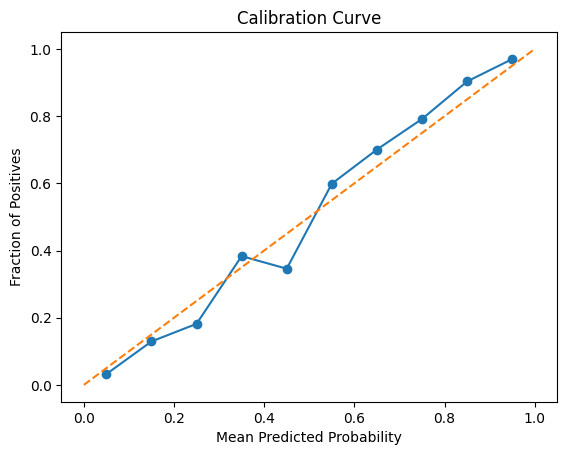

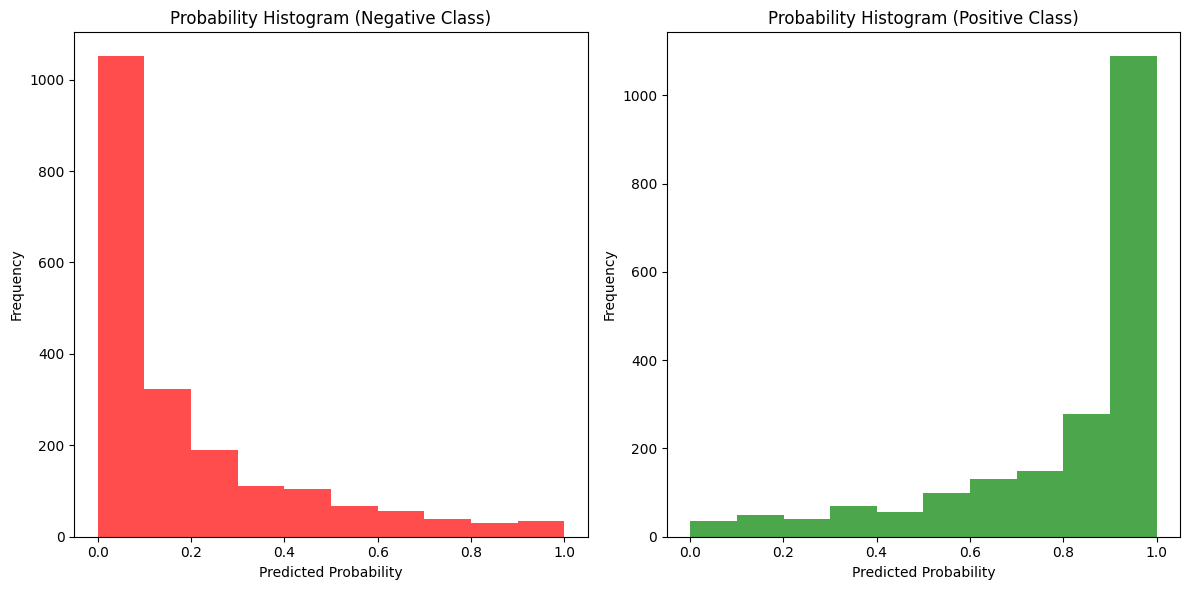

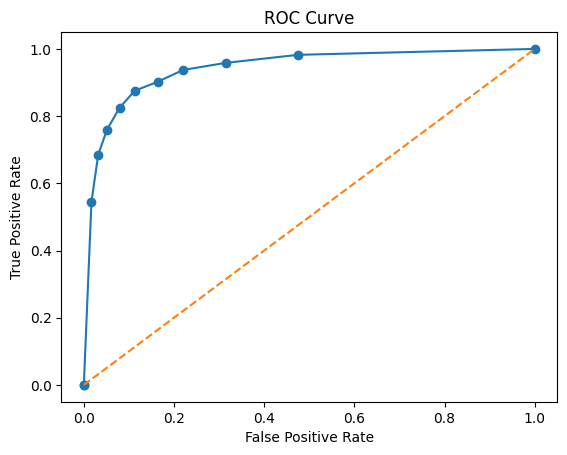

{'Confusion Matrix': [1778, 226, 249, 1747],
 'Accuracy': 0.88125,
 'Precision': 0.88545362392296,
 'Recall': 0.875250501002004,
 'Specificity': 0.8872255489021956,
 'F1 Score': 0.8803224993701184}

In [64]:
# TODO: Apply the classification_report function for the **TRAIN dataset predictions**
classification_report(y_train, y_train_prob, 1)

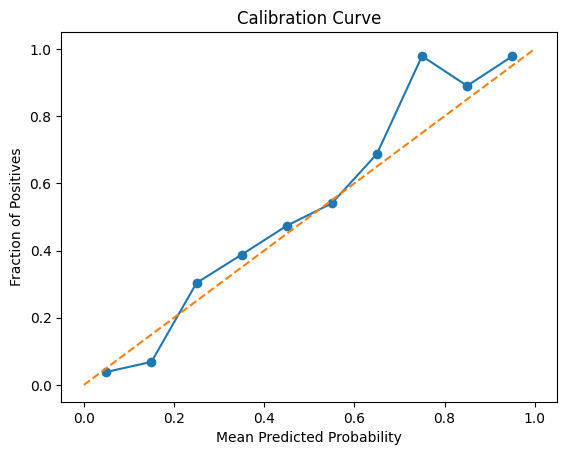

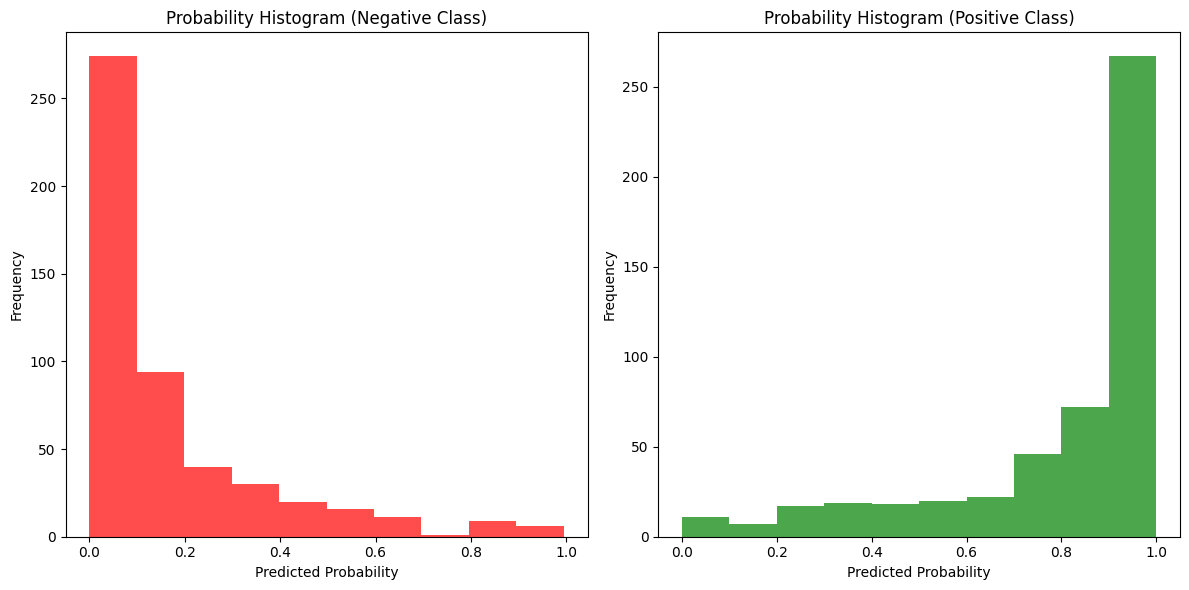

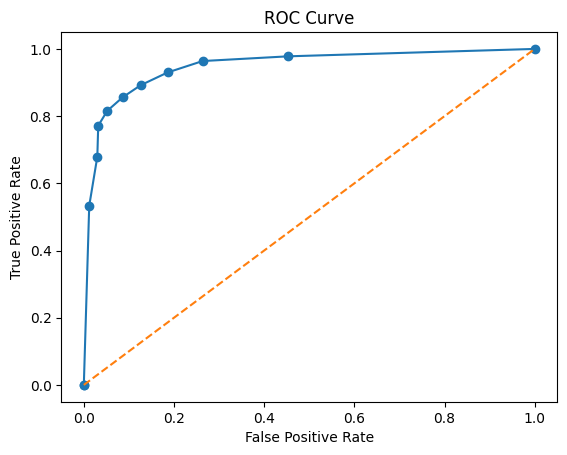

{'Confusion Matrix': [458, 43, 72, 427],
 'Accuracy': 0.885,
 'Precision': 0.9085106382978724,
 'Recall': 0.8557114228456913,
 'Specificity': 0.9141716566866267,
 'F1 Score': 0.8813209494324046}

In [65]:
# TODO: Apply the classification_report function for the **TEST dataset predictions**
classification_report(y_test, y_test_prob, 1)

**What do you think about this results? Do you observe any important features that you think are worth mentioning?**

> Write your answer here

## Weights and regularization of the model

Now we have obtained our first fully-functional model of logistic regression (_congrats!_). 

However, in our dataset we have 20 numerical regressors and 0 categorical regressors. Thus, we have a total of 20 input variables (columns) for the model, which entails a total of 21 parameters for the logistic regression model. 

> Fill the gaps in the text above

Since we have **not** conducted preprocessing procedure for the dataset, we may be "doing more than we need". In this case, we have purposefully left out the preprocessing steps so you can see the effects of the next part of this lab: **regularization**.

As you may recall, regularization implies modifying the objective (loss) function a bit in order to reduce the overall complexity of the model. In most cases, complexity is translated into high weight (parameter) values, and thus penalizing large values here will help the model to keep a more reasonable balance in the *bias/variance* trade-off. 

In class we introduced three main regularization techniques: **ridge**, **lasso** and **elastic net** regularization. Each one of those has their special properties, which we will investigate in just a second. Keep in mind, in each case, that modifying the objective function induces a change in the gradients of the gradient descent algorithm, which is why each regularization technique is able to affect the final values for the parameters of the fit.

_If you need to review the ideas behind regularization, now is the time. Make sure you get the gist of it before you continue._

**To perform the things you will need in the next part, you will need to implement the methods `ridge_regularization`, `lasso_regularization` and `elastic_net_regularization` in `LogisticRegressor`**.

### Ridge regularization

**Ridge regularization is performed introducing what in the objective function?**

> el sumatorio de las w^2

Once you have this, let us implement it already!

In [66]:
# We will perform regularization for different values of the regularization parameter
# TODO: Create an array (C_values) that contains 11 values distributed in log-scale, covering from 10^(-5) to 10^5
pow_min = -5
pow_max = 5
C_values = np.logspace(-5, 5, num=11)  # Vector of \lambda (regularization parameters)

# Keep these two empty lists to contain the final weights for each regularization parameter
weights_evolution = []    # To store the final weights for each C
accuracies = []           # To store accuracy for each C


Now, fit a logistic regression with ridge regularization for each possible value of the regularization parameter present in `C_values`.

In [67]:
for C in C_values:
    model = LogisticRegressor()  # Update to include necessary parameters
    model.fit(X_train, y_train, learning_rate = 0.01, num_iterations = 1000, penalty = 'ridge', C = C)
    weights_evolution.append(model.weights)
    
    # Predict and calculate accuracy in the test data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracies.append(accuracy)


KeyboardInterrupt: 

Now, in order to see how well the model behaves, we will plot different things we have access to. This means that we want to plot:
* The evolution for each weight vs. the regularization parameter
* The accuracy of the method vs. the regularization parameter.
    - In this case, mark also the value of the regularization that achieves the highest accuracy
    
**What is the regularization value that achieves highest accuracy?**
> 10

6
10.0
The optimum value of C based on accuracy is: 10.0


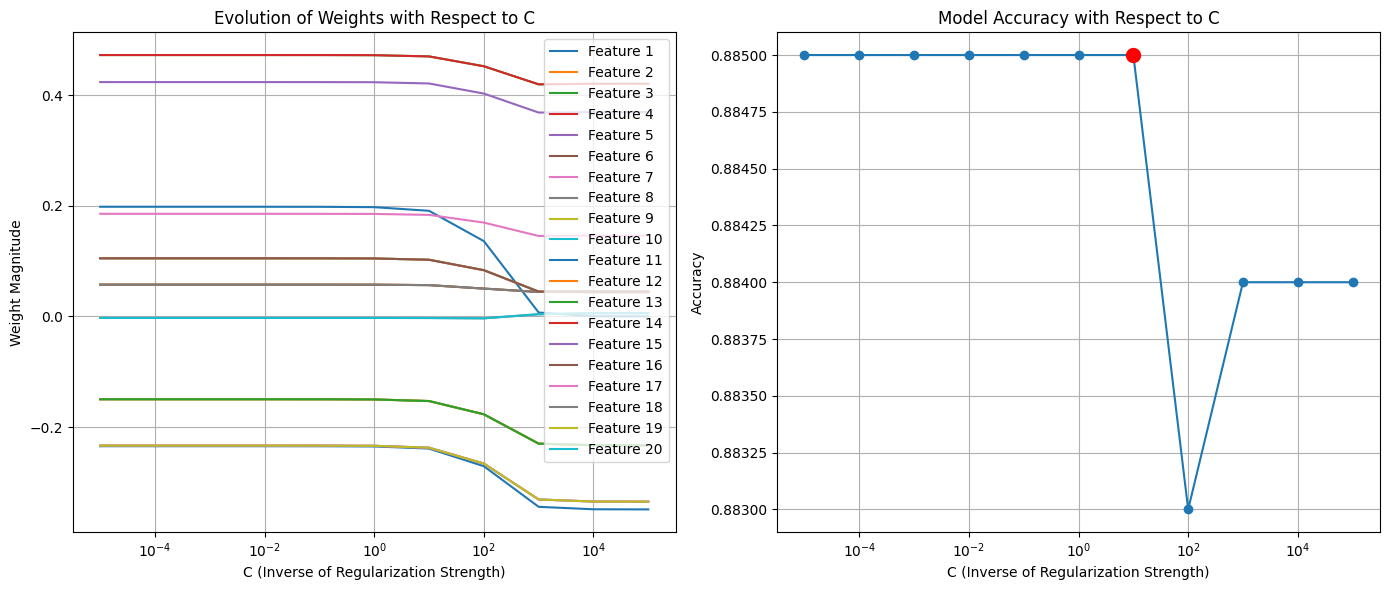

In [ ]:
# Plotting the evolution of weights
plt.figure(figsize=(14, 6))

# Plot for the changes in the weights in terms of the regularization parameter
plt.subplot(1, 2, 1)
for feature_index in range(len(weights_evolution[0])):
    weight_trajectory = [weights[feature_index] for weights in weights_evolution]
    plt.plot(C_values, weight_trajectory, label=f'Feature {feature_index + 1}')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Weight Magnitude')
plt.title('Evolution of Weights with Respect to C')
plt.legend(loc='best')
plt.grid(True)

# TODO: Find the maximum accuracy
max_accuracy = max(accuracies)
indices = []
for idx in range(len(accuracies)):
    if accuracies[idx] == max_accuracy:
        indices.append(idx)
# TODO: Filter the C values that correspond to the maximum accuracy
optimum_C_values = C_values[max(indices)]
# Select the maximum C from those that yield the highest accuracy
optimum_C = optimum_C_values

print(f"The optimum value of C based on accuracy is: {optimum_C}")

# Plotting accuracy as a function of C
plt.subplot(1, 2, 2)
plt.plot(C_values, accuracies, marker='o', linestyle='-')
plt.plot(optimum_C, max_accuracy, 'ro', markersize=10, label='Optimum C')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Respect to C')
plt.grid(True)

plt.tight_layout()
plt.show()

Now, using the model fit with the regularization parameter that induces the highest accuracy, we will create a separate object and train it in the training data with this optimum value of the regularization parameter. We will do this to ease further treatment to measure the performance of this preferred method with the `classification_report` function. 

In [ ]:
# Initialize the LogisticRegressor model with the optimum C
LogReg_optimum_C_Ridge = LogisticRegressor()

# TODO: Train the model using the training data and the optimum C
LogReg_optimum_C_Ridge.fit(X_train, y_train, 
                           learning_rate = learning_rate, 
                           num_iterations = num_iterations, 
                           penalty = 'ridge', 
                           C = 10)

Obtain the predictive probabilities for the `y_test`and apply the `classification_report` to check out the results. 

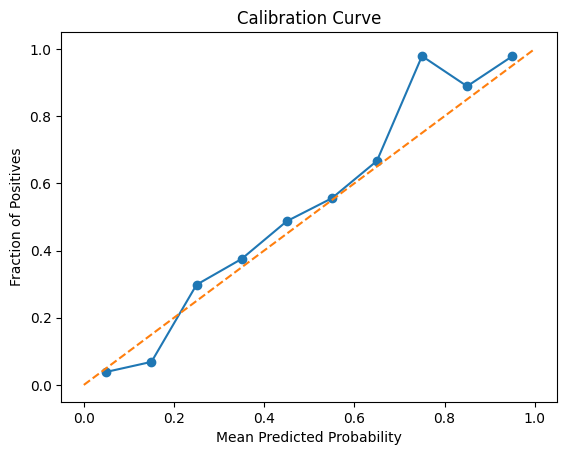

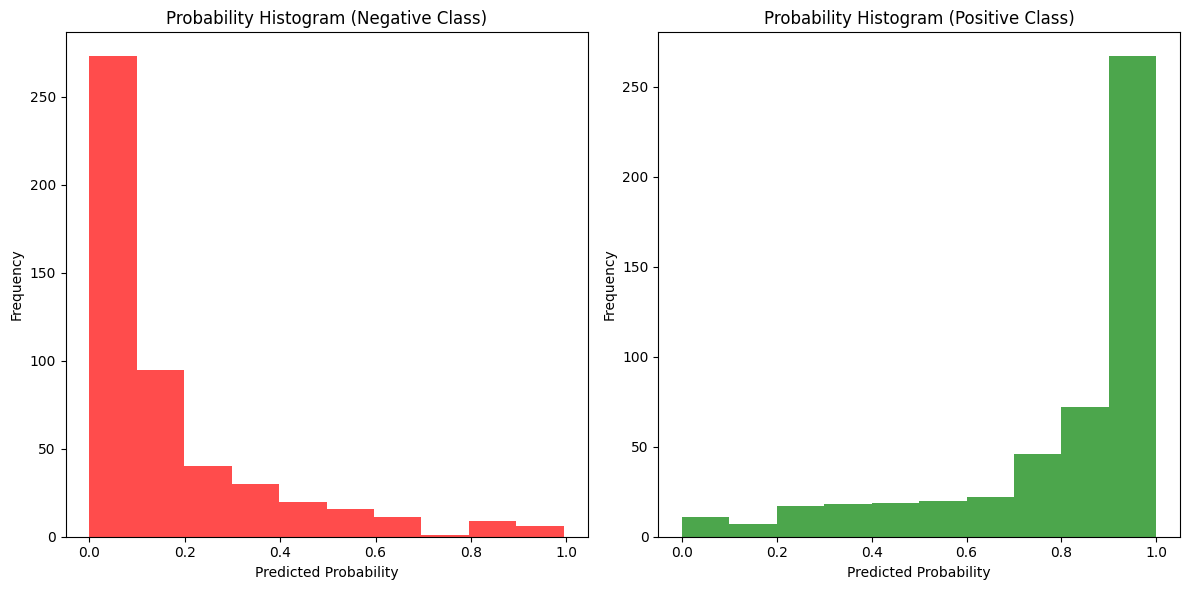

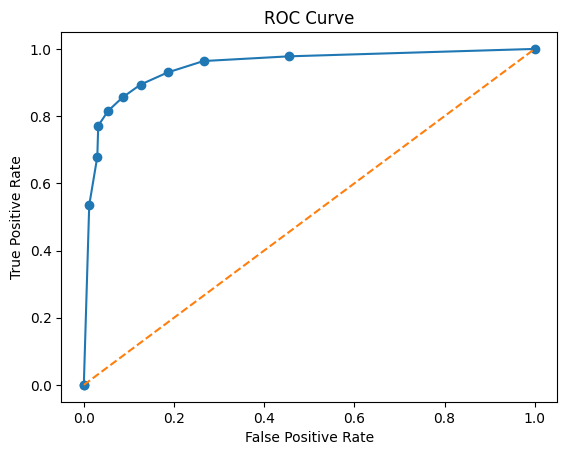

{'Confusion Matrix': [458, 43, 72, 427],
 'Accuracy': 0.885,
 'Precision': 0.9085106382978724,
 'Recall': 0.8557114228456913,
 'Specificity': 0.9141716566866267,
 'F1 Score': 0.8813209494324046}

In [ ]:
# TODO: Complete the call for the report with the y_test_prob obtained from the test data
y_test_prob = LogReg_optimum_C_Ridge.predict_proba(X_test)
classification_report(y_test, y_test_prob, 1)

Plot here the differences between the weights for the non-regularized model and the Ridge-regularized one you just obtained. 

[ 0.14487598  0.04979064  0.36355253 -0.11114347  0.32670645  0.04979064
  0.14134027  0.04979064 -0.11114347  0.08714852 -0.18121308  0.08714852
 -0.11114347  0.36355253 -0.18083147  0.08714852 -0.18083147  0.00887532
 -0.18083147  0.00887532] [ 0.19087121  0.056579    0.46977975 -0.15283016  0.42088566  0.056579
  0.18347785  0.056579   -0.15283016  0.10244829 -0.23868906  0.10244829
 -0.15283016  0.46977975 -0.23713292  0.10244829 -0.23713292 -0.00283567
 -0.23713292 -0.00283567]


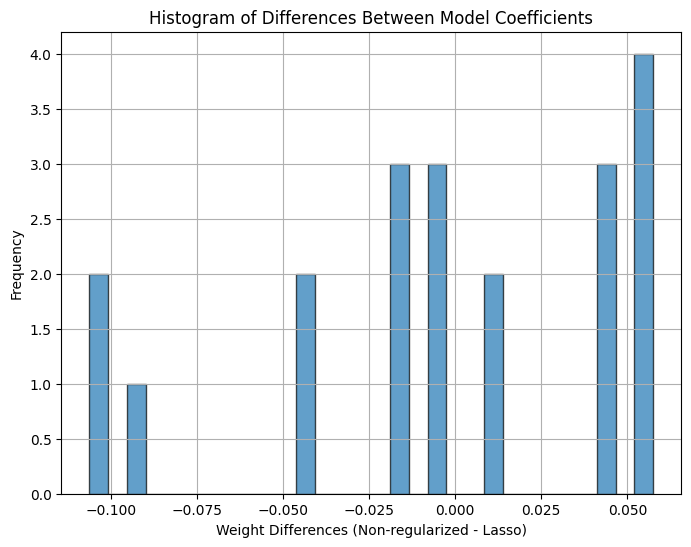

In [ ]:
# TODO: Plot an histogram containing the differences between the parameter values for both models
weight_differences = LogReg.weights - LogReg_optimum_C_Ridge.weights
print(LogReg.weights, LogReg_optimum_C_Ridge.weights)
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(weight_differences, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Weight Differences (Non-regularized - Lasso)")
plt.ylabel("Frequency")
plt.title("Histogram of Differences Between Model Coefficients")
plt.grid(True)
plt.show()

**What do you see when you compare this with the original (non-regularized) model?**

> Veo que cambian un poco los valores, varian dependiendo de la importancia que tienen

### Lasso

**Lasso regularization is performed introducing what in the objective function?**

> el sumatorio del valor absoluto de las w

In [ ]:
# We will perform regularization for different values of the regularization parameter
# TODO: Create an array (C_values) that contains 11 values distributed in log-scale, covering from 10^(-5) to 10^4
pow_min = -5
pow_max = 4  # In this case we maintain here a 4 instead of a 5 s.a. in the Ridge example

C_values = np.logspace(-5, 5, num=11) # Vector of \lambda (regularization parameters)
weights_evolution = []  # To store the final weights for each C
accuracies = []

Again, plot and display the following information:
* The evolution for each weight vs. the regularization parameter
* The accuracy of the method vs. the regularization parameter.
    - In this case, mark also the value of the regularization that achieves the highest accuracy
    
**What is the regularization value that achieves highest accuracy?**
> 10

The optimum value of C based on accuracy is: 10.0


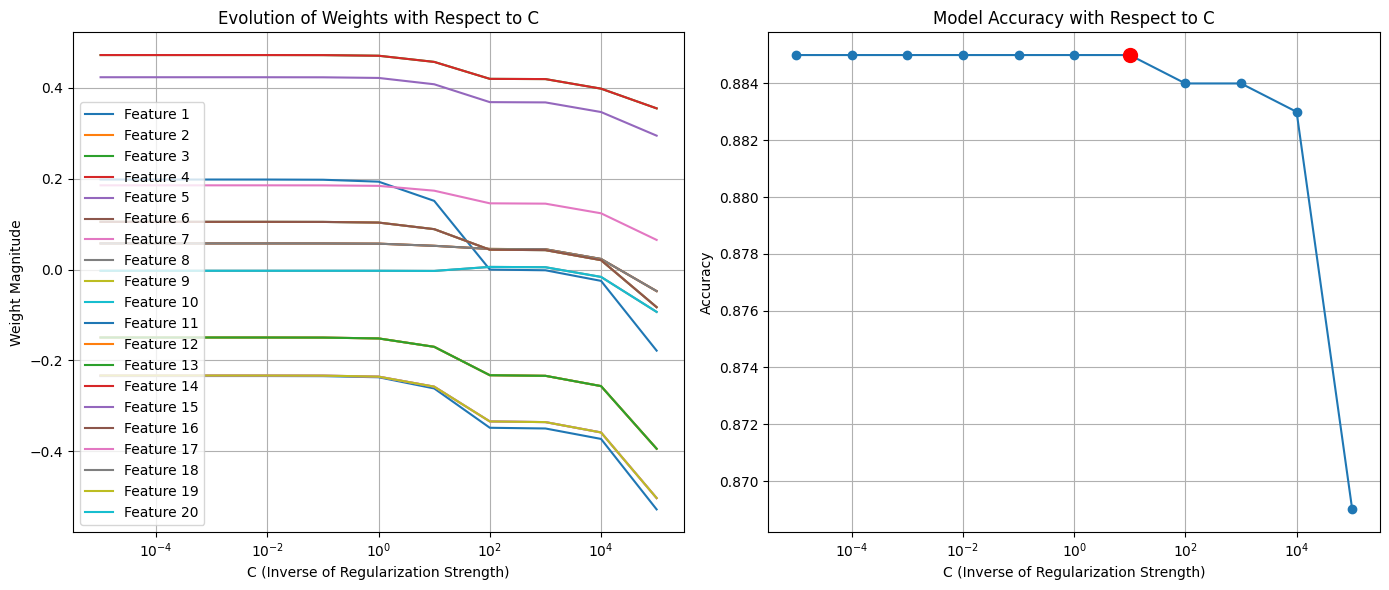

In [ ]:
# Assuming the LogisticRegressor class and dataset are prepared
for C in C_values:
    # Initialize model with current C
    model = LogisticRegressor()  # Update to include necessary parameters
    model.fit(X_train, y_train, learning_rate=learning_rate, num_iterations=num_iterations, 
              penalty='lasso', C=C)
    weights_evolution.append(model.weights)
    
    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the evolution of weights
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for feature_index in range(len(weights_evolution[0])):
    weight_trajectory = [weights[feature_index] for weights in weights_evolution]
    plt.plot(C_values, weight_trajectory, label=f'Feature {feature_index + 1}')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Weight Magnitude')
plt.title('Evolution of Weights with Respect to C')
plt.legend(loc='best')
plt.grid(True)

# TODO: Find the maximum accuracy
max_accuracy = max(accuracies)
indices = []
for idx in range(len(accuracies)):
    if accuracies[idx] == max_accuracy:
        indices.append(idx)
# TODO: Filter the C values that correspond to the maximum accuracy
optimum_C_values = C_values[max(indices)]
# Select the maximum C from those that yield the highest accuracy
optimum_C = optimum_C_values

print(f"The optimum value of C based on accuracy is: {optimum_C}")

# Plotting accuracy as a function of C
plt.subplot(1, 2, 2)
plt.plot(C_values, accuracies, marker='o', linestyle='-')
plt.plot(optimum_C, max_accuracy, 'ro', markersize=10, label='Optimum C')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Respect to C')
plt.grid(True)

plt.tight_layout()
plt.show()

**What difference do you observe when you compare with the Ridge regularization case?**
> Lo que puedo notar es que las w algunas bajan antes y bajan más

Again, create a separate object and train it in the training data with this optimum value of the regularization parameter.

In [ ]:
# Initialize the LogisticRegressor model with the optimum C
LogReg_optimum_C_Lasso = LogisticRegressor()

# TODO: Train the model using the training data and the optimum C
LogReg_optimum_C_Lasso.fit(X_train, y_train, 
                           learning_rate = learning_rate, 
                           num_iterations = num_iterations, 
                           penalty = 'lasso', 
                           C = optimum_C)

Apply the `classification_report` function and check out the results

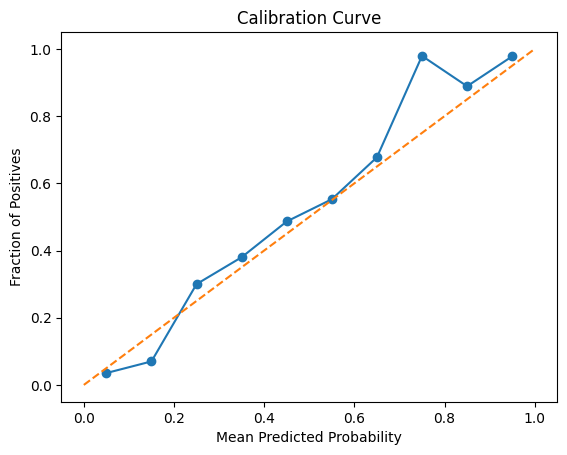

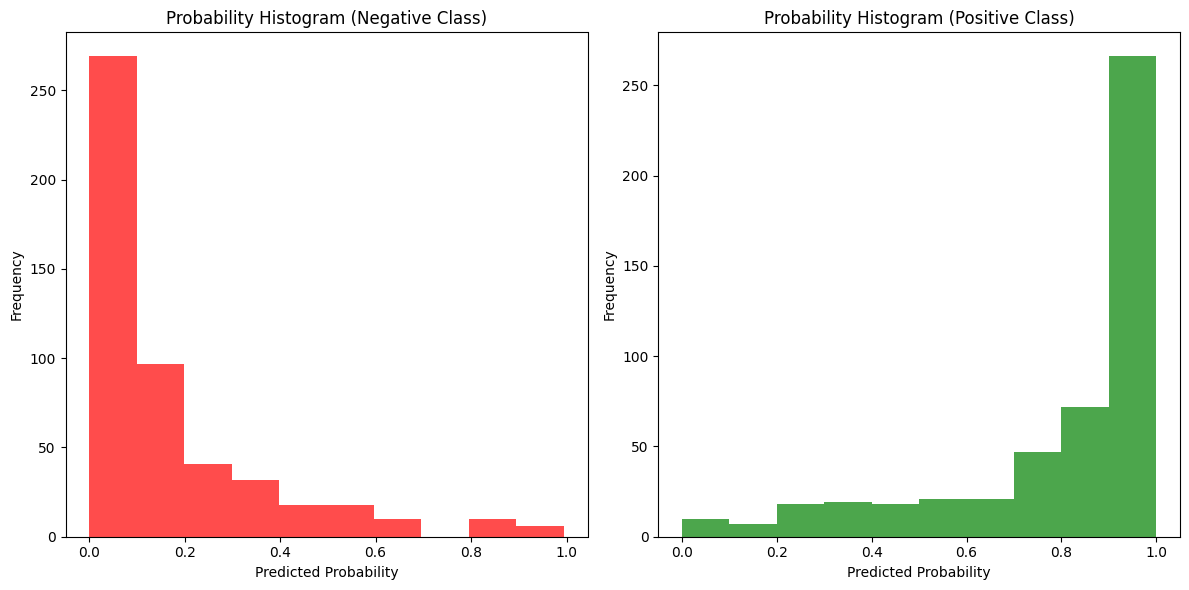

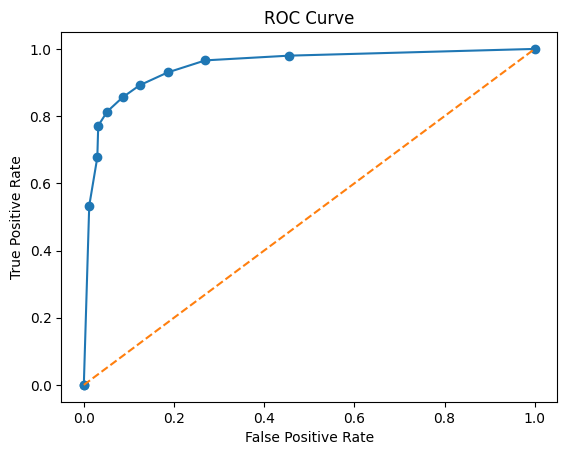

{'Confusion Matrix': [458, 43, 72, 427],
 'Accuracy': 0.885,
 'Precision': 0.9085106382978724,
 'Recall': 0.8557114228456913,
 'Specificity': 0.9141716566866267,
 'F1 Score': 0.8813209494324046}

In [ ]:
# TODO: Complete the call for the report with the y_test_prob obtained from the test data
y_test_prob = LogReg_optimum_C_Lasso.predict_proba(X_test)
classification_report(y_test, y_test_prob, 1)

Plot here the differences between the weights for the non-regularized model and this new Lasso-regularized one you just obtained. 

[ 0.14487598  0.04979064  0.36355253 -0.11114347  0.32670645  0.04979064
  0.14134027  0.04979064 -0.11114347  0.08714852 -0.18121308  0.08714852
 -0.11114347  0.36355253 -0.18083147  0.08714852 -0.18083147  0.00887532
 -0.18083147  0.00887532] [ 0.19087121  0.056579    0.46977975 -0.15283016  0.42088566  0.056579
  0.18347785  0.056579   -0.15283016  0.10244829 -0.23868906  0.10244829
 -0.15283016  0.46977975 -0.23713292  0.10244829 -0.23713292 -0.00283567
 -0.23713292 -0.00283567]


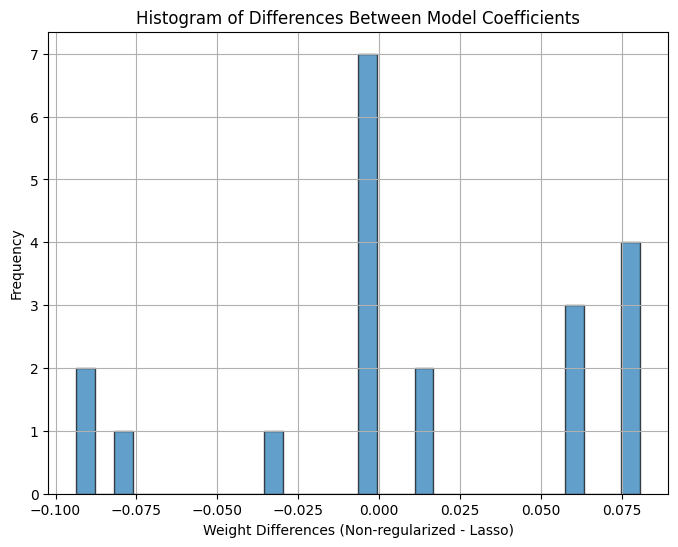

In [ ]:
# TODO: Plot an histogram containing the differences between the parameter values for both models
weight_differences = LogReg.weights - LogReg_optimum_C_Lasso.weights
print(LogReg.weights, LogReg_optimum_C_Lasso.weights)
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(weight_differences, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Weight Differences (Non-regularized - Lasso)")
plt.ylabel("Frequency")
plt.title("Histogram of Differences Between Model Coefficients")
plt.grid(True)
plt.show()

**What do you see when you compare this with the original (non-regularized) model?**

> Write your answer here

### ElasticNet

**ElasticNet regularization is performed introducing what in the objective function?**

> Write your answer here

In [ ]:
# We will perform regularization for different values of the regularization parameter
# TODO: Create an array (C_values) that contains 11 values distributed in log-scale, covering from 10^(-5) to 10^4
pow_min = -5
pow_max = 4  # In this case we maintain here a 4 instead of a 5 s.a. in the Ridge example

C_values = np.logspace(-5, 5, num=11) # Vector of \lambda (regularization parameters)
weights_evolution = []  # To store the final weights for each C
accuracies = []

Again, plot and display the following information:
* The evolution for each weight vs. the regularization parameter
* The accuracy of the method vs. the regularization parameter.
    - In this case, mark also the value of the regularization that achieves the highest accuracy
    
**What is the regularization value that achieves highest accuracy?**
> Write your answer here

The optimum value of C based on accuracy is: 10.0


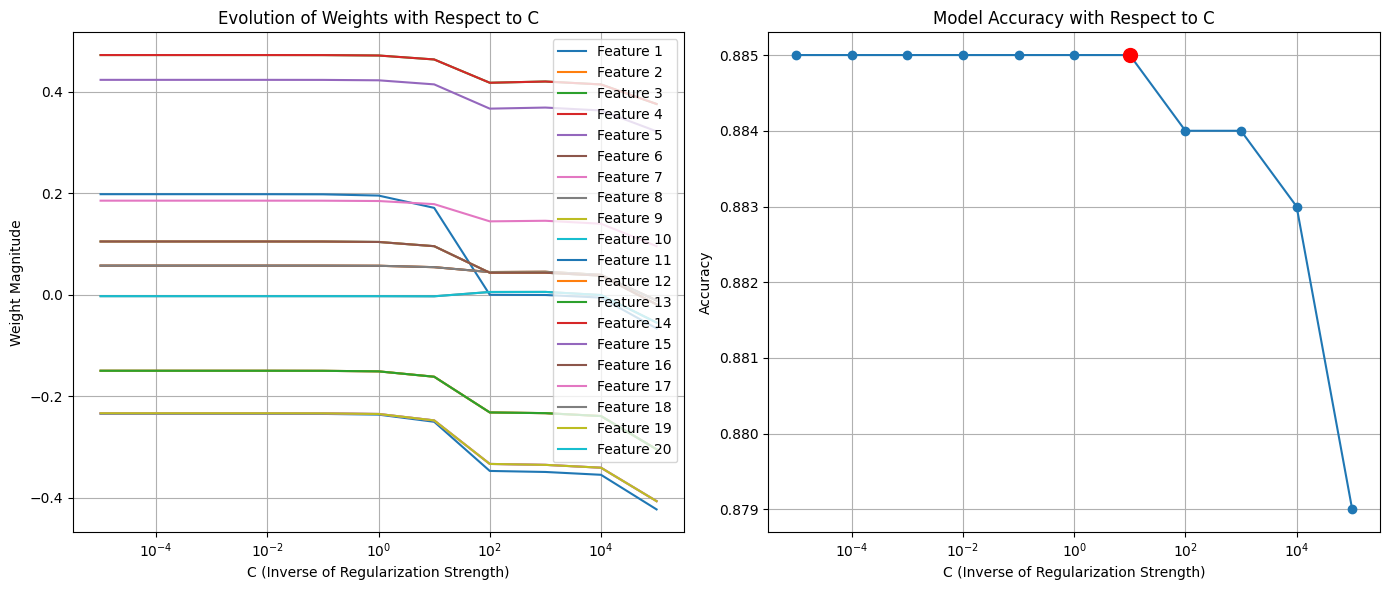

In [ ]:
# Assuming the LogisticRegressor class and dataset are prepared
for C in C_values:
    # Initialize model with current C
    model = LogisticRegressor()  # Update to include necessary parameters
    model.fit(X_train, y_train, learning_rate=learning_rate, num_iterations=num_iterations, 
              penalty='elasticnet', C=C)
    weights_evolution.append(model.weights)
    
    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the evolution of weights 
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for feature_index in range(len(weights_evolution[0])):
    weight_trajectory = [weights[feature_index] for weights in weights_evolution]
    plt.plot(C_values, weight_trajectory, label=f'Feature {feature_index + 1}')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Weight Magnitude')
plt.title('Evolution of Weights with Respect to C')
plt.legend(loc='best')
plt.grid(True)

# TODO: Find the maximum accuracy
max_accuracy = max(accuracies)
indices = []
for idx in range(len(accuracies)):
    if accuracies[idx] == max_accuracy:
        indices.append(idx)
# TODO: Filter the C values that correspond to the maximum accuracy
optimum_C_values = C_values[max(indices)]
# Select the maximum C from those that yield the highest accuracy
optimum_C = optimum_C_values

print(f"The optimum value of C based on accuracy is: {optimum_C}")

# Plotting accuracy as a function of C
plt.subplot(1, 2, 2)
plt.plot(C_values, accuracies, marker='o', linestyle='-')
plt.plot(optimum_C, max_accuracy, 'ro', markersize=10, label='Optimum C')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Respect to C')
plt.grid(True)

plt.tight_layout()
plt.show()

**What difference do you observe when you compare with the Ridge regularization case?**
> Write your answer here

Again, create a separate object and train it in the training data with this optimum value of the regularization parameter.

In [ ]:
# Initialize the LogisticRegressor model with the optimum C
LogReg_optimum_C_ElasticNet = LogisticRegressor()

# TODO: Train the model using the training data and the optimum C
LogReg_optimum_C_ElasticNet.fit(X_train, y_train, 
                                learning_rate = learning_rate, 
                                num_iterations = num_iterations, 
                                penalty = 'elasticnet', 
                                C = optimum_C)

Apply the `classification_report` function and check out the results

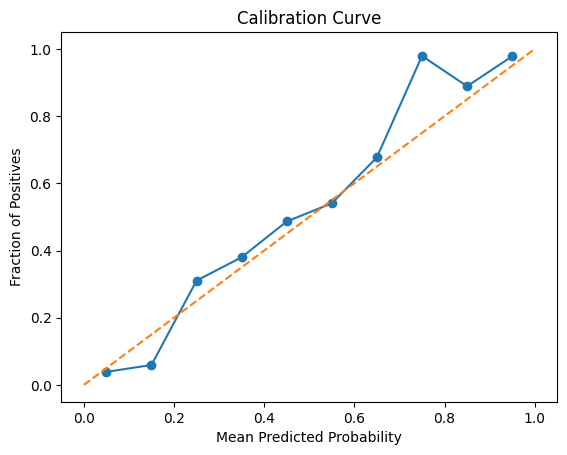

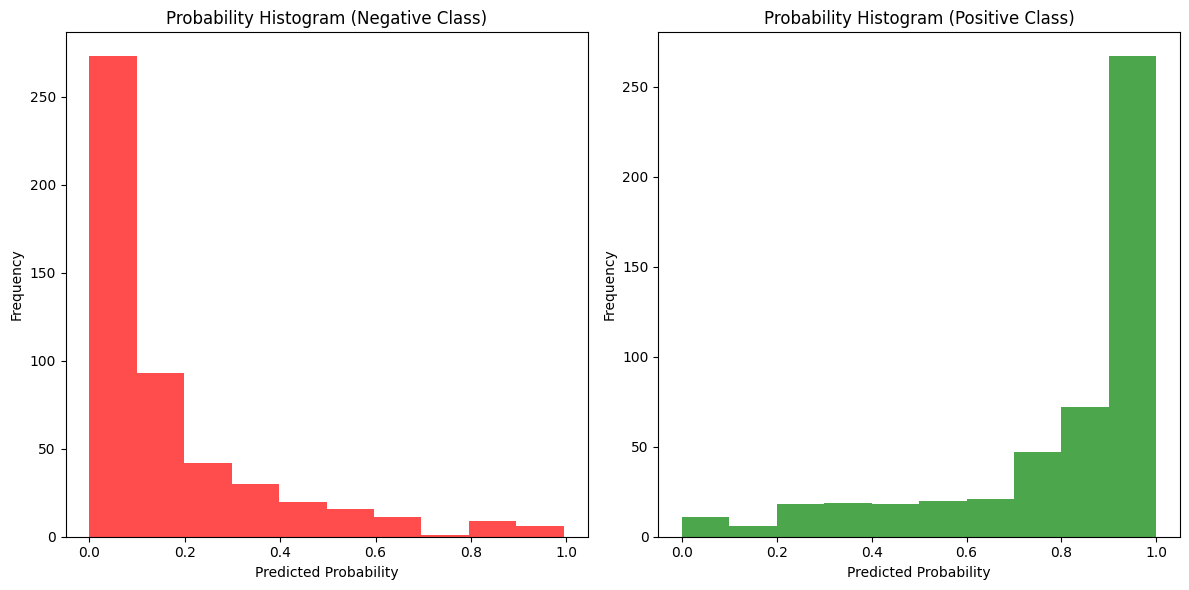

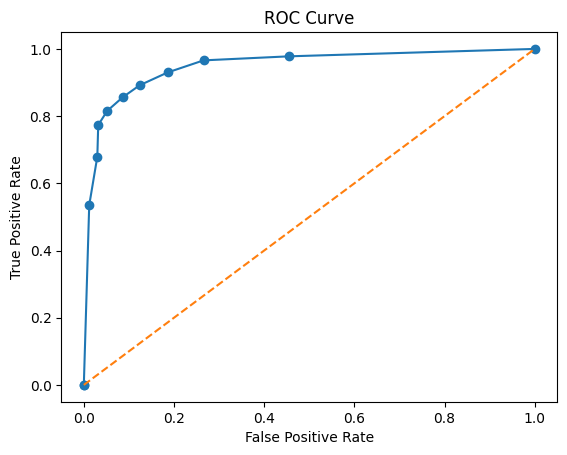

{'Confusion Matrix': [458, 43, 72, 427],
 'Accuracy': 0.885,
 'Precision': 0.9085106382978724,
 'Recall': 0.8557114228456913,
 'Specificity': 0.9141716566866267,
 'F1 Score': 0.8813209494324046}

In [ ]:
# TODO: Complete the call for the report with the y_test_prob obtained from the test data
y_test_prob = LogReg_optimum_C_ElasticNet.predict_proba(X_test)
classification_report(y_test, y_test_prob, 1)

Plot here the differences between the weights for the non-regularized model and this new Lasso-regularized one you just obtained. 

[ 0.14487598  0.04979064  0.36355253 -0.11114347  0.32670645  0.04979064
  0.14134027  0.04979064 -0.11114347  0.08714852 -0.18121308  0.08714852
 -0.11114347  0.36355253 -0.18083147  0.08714852 -0.18083147  0.00887532
 -0.18083147  0.00887532] [ 0.19087121  0.056579    0.46977975 -0.15283016  0.42088566  0.056579
  0.18347785  0.056579   -0.15283016  0.10244829 -0.23868906  0.10244829
 -0.15283016  0.46977975 -0.23713292  0.10244829 -0.23713292 -0.00283567
 -0.23713292 -0.00283567]


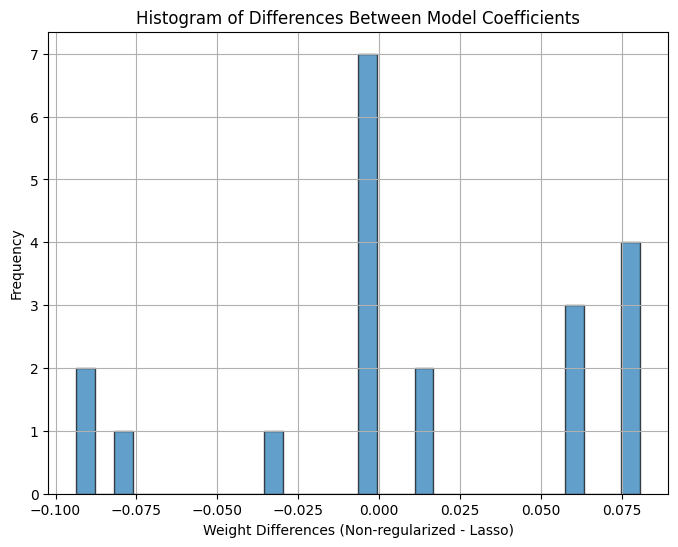

In [ ]:
# TODO: Plot an histogram containing the differences between the parameter values for both models
weight_differences = LogReg.weights - LogReg_optimum_C_Lasso.weights
print(LogReg.weights, LogReg_optimum_C_Ridge.weights)
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(weight_differences, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Weight Differences (Non-regularized - Lasso)")
plt.ylabel("Frequency")
plt.title("Histogram of Differences Between Model Coefficients")
plt.grid(True)
plt.show()

**What do you see when you compare this with the original (non-regularized) model?**

> Write your answer here

---

**Comparing the un-regularized model with the three other versions with regularization, what do you observe? What can you conclude about the complete analysis?**

> Write your answer here